In [1]:
import pandas as pd
import numpy as np

In [2]:
from fbprophet import Prophet

In [3]:
from fbprophet.plot import add_changepoints_to_plot
from matplotlib import pyplot as plt


In [4]:
data=pd.read_csv('../input/hourly-data/hourly_data.csv')

In [5]:
data.head()

,date_time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,city,date,holiday_flag
0,2019-08-01 00:00:00,6.841507,8.501703,1.801855,0.975186,2.232007,4.302977,2.677340,4.825840,3.652807,...,56,0.0,998,31,10,86,11,Gurgaon,2019-08-01,0
1,2019-08-01 01:00:00,7.407684,8.459075,1.490131,1.842207,2.236677,4.314749,2.610280,4.463227,3.053721,...,58,0.0,998,31,10,96,11,Gurgaon,2019-08-01,0
2,2019-08-01 02:00:00,7.350885,8.113246,1.482323,1.465390,1.991346,4.216204,2.753061,3.801375,3.115622,...,60,0.0,998,31,10,107,11,Gurgaon,2019-08-01,0
3,2019-08-01 03:00:00,6.639281,7.923313,2.238207,1.440677,2.091048,4.734834,3.044784,3.895697,2.844864,...,62,0.0,998,30,10,118,11,Gurgaon,2019-08-01,0
4,2019-08-01 04:00:00,6.597653,7.300900,1.744991,2.547984,1.872143,3.600600,2.918532,3.768754,3.383187,...,61,0.0,999,31,10,121,11,Gurgaon,2019-08-01,0


In [6]:
data=data[['date_time','AC 1']]

In [7]:
 data.rename(columns={'date_time':'ds','AC 1':'y'} ,inplace=True)

In [8]:
data.head()

,ds,y
0,2019-08-01 00:00:00,6.841507
1,2019-08-01 01:00:00,7.407684
2,2019-08-01 02:00:00,7.350885
3,2019-08-01 03:00:00,6.639281
4,2019-08-01 04:00:00,6.597653


In [9]:
train=data[data['ds'] <='2019-09-15']
test=data[data['ds'] >'2019-09-15']

In [10]:
m=Prophet(changepoint_prior_scale=2.5, weekly_seasonality = True)

In [11]:
m.fit(train)

Initial log joint probability = -49.9648
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1450.91     0.0598324       62.4047           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1473.21     0.0884101       95.3146           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1485.59    0.00956037       24.6494      0.5793      0.5793      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1510.68    0.00763405       66.2112     0.07099           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1518.47    0.00846353       22.5499           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [12]:
future=m.make_future_dataframe(periods=384 , freq='H')
forecast= m.predict(future)

 log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       1539.06     0.0163459       2.44525           1           1     3248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2786       1539.17   2.60616e-05       1.98985   7.008e-06       0.001     3393  LS failed, Hessian reset 
    2799       1539.18   9.38878e-05       1.01455           1           1     3407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2827       1539.19   0.000244539       9.64554   2.955e-05       0.001     3480  LS failed, Hessian reset 
    2899       1539.21   0.000168406        1.4346           1           1     3568   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       1539.25   0.000380145       1.48649           1           1     3689   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0 

In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1459,2019-09-30 19:00:00,7.824420,-46.305922,60.460110,-44.942887,61.967007,-2.014385,-2.014385,-2.014385,-0.258061,-0.258061,-0.258061,-1.756324,-1.756324,-1.756324,0.0,0.0,0.0,5.810035
1460,2019-09-30 20:00:00,7.835911,-46.807390,59.656609,-45.170426,62.168801,-2.114840,-2.114840,-2.114840,-0.366421,-0.366421,-0.366421,-1.748418,-1.748418,-1.748418,0.0,0.0,0.0,5.721071
1461,2019-09-30 21:00:00,7.847401,-46.938262,61.564094,-45.395665,62.337897,-2.022855,-2.022855,-2.022855,-0.288051,-0.288051,-0.288051,-1.734804,-1.734804,-1.734804,0.0,0.0,0.0,5.824546
1462,2019-09-30 22:00:00,7.858892,-46.976991,61.233782,-45.565700,62.528834,-1.710718,-1.710718,-1.710718,0.004587,0.004587,0.004587,-1.715305,-1.715305,-1.715305,0.0,0.0,0.0,6.148174
1463,2019-09-30 23:00:00,7.870382,-46.564935,62.371781,-45.692540,62.712152,-1.304708,-1.304708,-1.304708,0.385077,0.385077,0.385077,-1.689785,-1.689785,-1.689785,0.0,0.0,0.0,6.565674


In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1459,2019-09-30 19:00:00,5.810035,-46.305922,60.460110
1460,2019-09-30 20:00:00,5.721071,-46.807390,59.656609
1461,2019-09-30 21:00:00,5.824546,-46.938262,61.564094
1462,2019-09-30 22:00:00,6.148174,-46.976991,61.233782
1463,2019-09-30 23:00:00,6.565674,-46.564935,62.371781


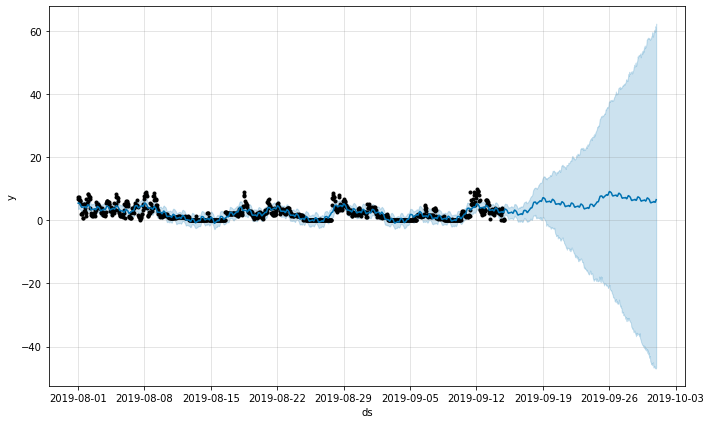

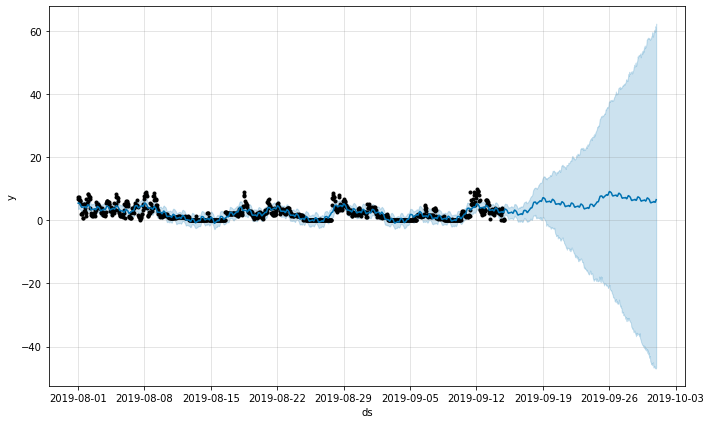

In [15]:
m.plot(forecast)


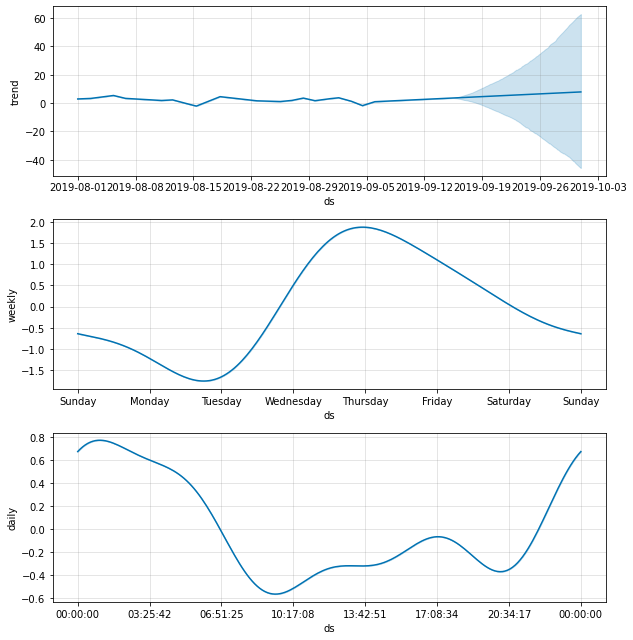

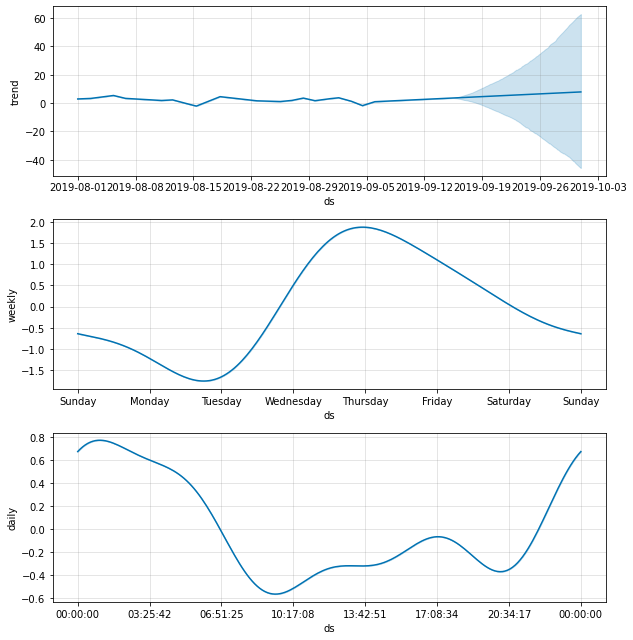

In [16]:
m.plot_components(forecast)


In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-01 00:00:00,2.913706,3.624833,7.284907,2.913706,2.913706,2.544118,2.544118,2.544118,0.672385,0.672385,0.672385,1.871734,1.871734,1.871734,0.0,0.0,0.0,5.457824
1,2019-08-01 01:00:00,2.922079,3.837141,7.169865,2.922079,2.922079,2.636022,2.636022,2.636022,0.770383,0.770383,0.770383,1.865639,1.865639,1.865639,0.0,0.0,0.0,5.558101
2,2019-08-01 02:00:00,2.930453,3.731317,7.320426,2.930453,2.930453,2.576737,2.576737,2.576737,0.721195,0.721195,0.721195,1.855542,1.855542,1.855542,0.0,0.0,0.0,5.507190
3,2019-08-01 03:00:00,2.938827,3.744187,7.199699,2.938827,2.938827,2.473729,2.473729,2.473729,0.632031,0.632031,0.632031,1.841698,1.841698,1.841698,0.0,0.0,0.0,5.412556
4,2019-08-01 04:00:00,2.947201,3.682017,7.175831,2.947201,2.947201,2.381036,2.381036,2.381036,0.556666,0.556666,0.556666,1.824370,1.824370,1.824370,0.0,0.0,0.0,5.328237


In [18]:
forecast.shape

(1464, 19)

In [19]:
data.shape

(1464, 2)

In [20]:
pred= data.copy()

In [21]:
pred['yhat']=forecast['yhat']

<AxesSubplot:>

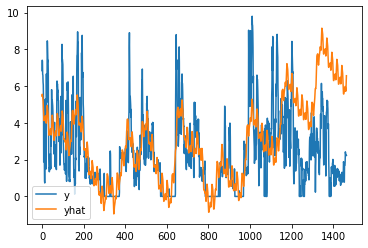

In [22]:
pred.plot()

In [23]:
# basic model of fb prophet fails to capture the peak points
# sampling the data to weekly might give better results
# we can add temperature variables as well
# we can add holidays as well
# we can use weekends flag as well

In [24]:
data=pd.read_csv('../input/hourly-data/hourly_data.csv')

In [25]:
data.columns

Index(['date_time', 'AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7',
       'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15',
       'AC 16', 'AC 17', 'AC 18', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'city', 'date', 'holiday_flag'],
      dtype='object')

In [26]:
data=data[['date_time','AC 1','humidity','holiday_flag','tempC']]

In [27]:
 data.rename(columns={'date_time':'ds','AC 1':'y'} ,inplace=True)

In [28]:
data.head()

,ds,y,humidity,holiday_flag,tempC
0,2019-08-01 00:00:00,6.841507,56,0,31
1,2019-08-01 01:00:00,7.407684,58,0,31
2,2019-08-01 02:00:00,7.350885,60,0,31
3,2019-08-01 03:00:00,6.639281,62,0,30
4,2019-08-01 04:00:00,6.597653,61,0,31


In [29]:
train=data[data['ds'] <'2019-09-15']
test=data[data['ds'] >'2019-09-15']

In [30]:
prophet = Prophet(growth='linear',
                  yearly_seasonality=False,
                  weekly_seasonality=True,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=7,
                  holidays_prior_scale=5,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0
                 ).add_seasonality(name='weekly',
                                    period=168,
                                    fourier_order=2,
                                    prior_scale=10,
                                    mode='multiplicative')

In [31]:
prophet.add_country_holidays(country_name='IN')
prophet.add_regressor('humidity')
prophet.add_regressor('holiday_flag')
prophet.add_regressor('tempC')
prophet.fit(train)


Initial log joint probability = -49.9648


/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1303.98      0.025145       82.7168      0.2895           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       1304.58   4.86853e-08       80.3208      0.4177           1      212   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [32]:
future = prophet.make_future_dataframe(periods=384, freq='H')


/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


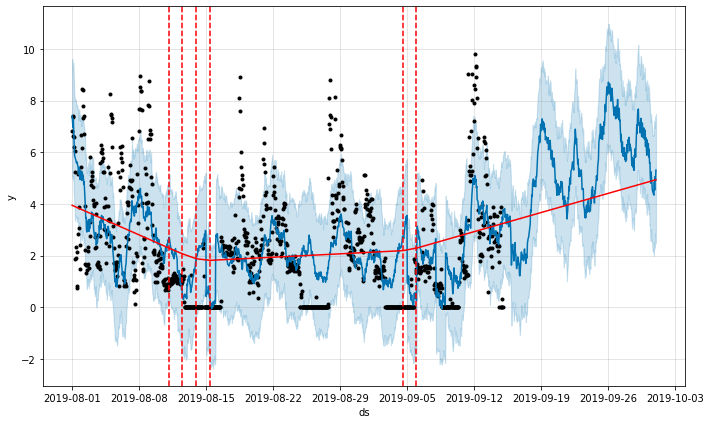

/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


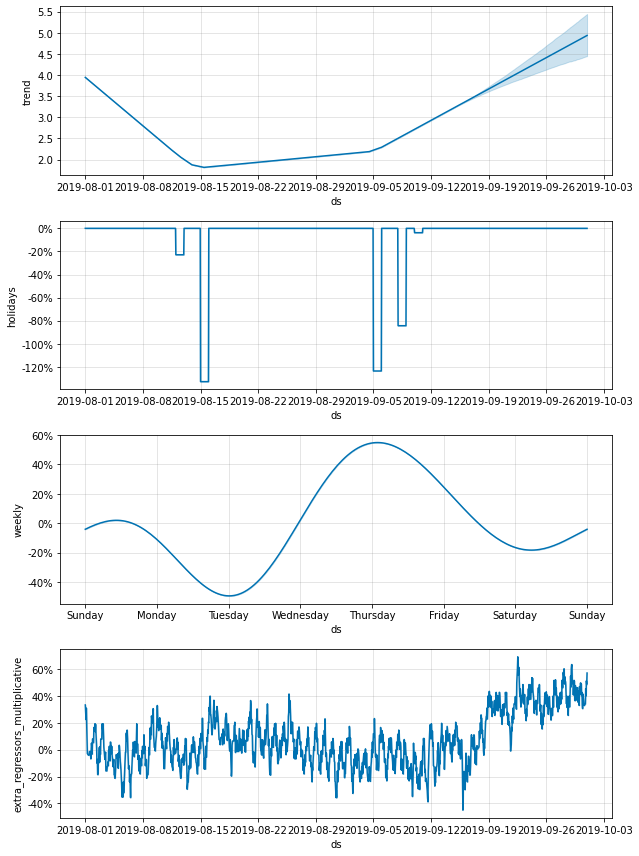

In [33]:
future['humidity'] = data['humidity']
future['holiday_flag'] = data['holiday_flag']
future['tempC'] = data['tempC']
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [34]:
data['yhat']= forecast['yhat']

In [35]:
data.set_index('ds',inplace=True)

<AxesSubplot:xlabel='ds'>

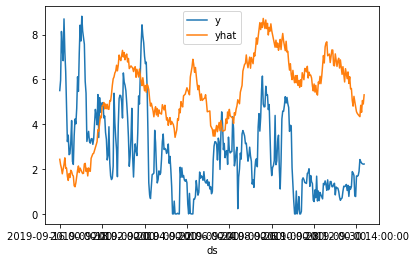

In [36]:
data[['y','yhat']].tail(360).plot()

In [37]:
15*24

360